In [4]:
import pandas as pd
df1 = pd.read_csv('brexit_tweet_count_by_data.csv')

#print(df1.head(5))

df2 = df1.pivot(index = 'date', columns = 'retweet', values = 'total_count')
#df2 = df2.rename(columns={'False': 'Tweet'}).rename(columns={'True': 'Retweet'})

print(df2.head(5))


retweet     False  True 
date                    
2016-01-06    699   1942
2016-01-07   3511   4811
2016-01-08   2401   4752
2016-01-09   1620   4193
2016-01-10   2744   5038


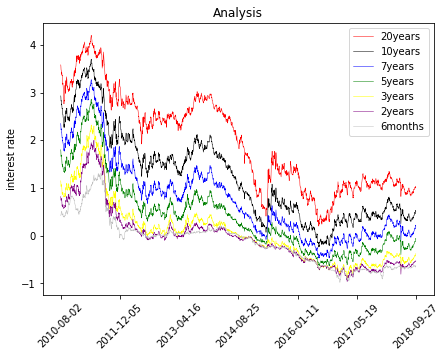

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


names = locals()
list = ['20years', '10years', '7years', '5years', '3years', '2years','6months']
i = 0
while i < 7:
    path = 'BBData/'+ list[i] + '.csv'
    #print(path)
    file = pd.read_csv(path)
    file = pd.DataFrame(file)
    file = file.drop([0,1,2,3])
    file.columns = ['Date', list[i], 'c']
    file1 = file[file[list[i]] != '.']
    names['clean' + str(i)] = file1.drop(file.columns[2], axis = 1).drop(file.columns[0], axis = 1)
    names['clean' + str(i)] = pd.DataFrame(names['clean' + str(i)],dtype = np.float)
    dates = file1.drop(file.columns[2], axis = 1).drop(file.columns[1], axis = 1)
    names['datafile' + str(i)] = dates.join(names['clean' + str(i)])
    i += 1

    
#print(datafile1)    

i = 1
while i < 7:
    merge0 = datafile0
    names['merge' + str(i)] = pd.merge(names['merge' + str(i-1)], names['datafile' + str(i)], how = 'outer')
    i += 1

fig = plt.figure(figsize = (7, 5))
i = 0
list2 = ['red', 'black', 'blue', 'green', 'yellow', 'purple', 'silver']
while i < 7: 
    plt.plot(merge6['Date'], merge6[list[i]], color = list2[i], label = list[i], lw = 0.5)
    i += 1


plt.legend()
plt.title('Analysis')
plt.xticks([0, len(merge6)/6, len(merge6)/6*2, len(merge6)/6*3, len(merge6)/6*4, len(merge6)/6*5, len(merge6)-1], rotation = 45)
plt.ylabel('interest rate')
plt.show()